<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tqdm

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
### Type your code here

tr_mcc_codes = pd.read_csv('/Users/valeria/Downloads/Telegram Desktop/transact/tr_mcc_codes.csv', sep=';')

tr_types = pd.read_csv('/Users/valeria/Downloads/Telegram Desktop/transact/tr_types.csv', sep=';')

transactions = pd.read_csv('/Users/valeria/Downloads/Telegram Desktop/transact/transactions.csv', sep=',')

gender_train = pd.read_csv('/Users/valeria/Downloads/Telegram Desktop/transact/gender_train.csv', sep=';')

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

Сначала для корректного соединения таблиц нужно определить названия столбцв для соединения. Для этого используем метод columns. Он позволяет получить названия столбцов. Для соединения нужно чтобы они совпадали в основной и присоединяемой таблице.

In [3]:
# Проверка названий столбцов
print("gender_train ", gender_train.columns)
print("tr_types ", tr_types.columns)
print("tr_mcc_codes ", tr_mcc_codes.columns)
print("transactions", transactions.columns)


gender_train  Index(['customer_id', 'gender'], dtype='object')
tr_types  Index(['tr_type', 'tr_description'], dtype='object')
tr_mcc_codes  Index(['mcc_code', 'mcc_description'], dtype='object')
transactions Index(['customer_id', 'tr_datetime', 'mcc_code', 'tr_type', 'amount',
       'term_id'],
      dtype='object')


Получив названия столбцов можно определить порядок соединения. Первыми соединяются transactions и gender_train по столбцу customer_id, с помошью левого соединения (how='left'). Для проведения операций соединения датафреймов используется библиотека pandas. Далее соединяю merged_data (результирующая таблица) и tr_mcc_codes по столбцу mcc_code и merged_data с tr_types по столбцу tr_type.

In [9]:
### Type your code here
# Преобразование типа данных столбца 'customer_id' в DataFrame transactions
transactions['customer_id'] = transactions['customer_id'].astype(str)

# Затем объединяем
merged_data = pd.merge(transactions, gender_train, how='left', on='customer_id')
merged_data = pd.merge(merged_data, tr_mcc_codes, how='inner', on='mcc_code')
merged_data = pd.merge(merged_data, tr_types, how='inner', on='tr_type')

# Проверка размера итоговой таблицы
print(merged_data.shape)

(6846580, 9)


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

Вначале производим фильтрацию данных в полученной ранее общей таблице. Для проведения вычислений нам нужны только негативные данные по столбцу amount. Полученные данный записываем в negative_transactions.
Далее из этого массива данных получаем еще два. Точнее с женщинами (где gender принимает значение F, то есть female) и с мужчинами (значение M, то есть man). 
Далее находим среднее значение по этим двум таблицам (с помошью функции .mean())
Находим разницу этих средних значений
С помощью функции abs() находим модуль полученного числа
С помощью функции round производим округление числа до 2 знаков после запятой

In [10]:
### Type your code here
# Отфильтровать данные так, чтобы учесть только отрицательные значения amount
negative_transactions = merged_data[merged_data['amount'] < 0]

# Разделить отфильтрованные данные на две группы: женщины и мужчины
women_transactions = negative_transactions[negative_transactions['gender'] == 'F']
men_transactions = negative_transactions[negative_transactions['gender'] == 'M']

# Вычислить средние траты для каждой группы
avg_women_expenses = women_transactions['amount'].mean()
avg_men_expenses = men_transactions['amount'].mean()

# Найти разницу между средними тратами
difference = avg_women_expenses - avg_men_expenses

# Модуль разницы
abs_difference = abs(difference)

# Округление до двух знаков после запятой
rounded_difference = round(abs_difference, 2)

print(rounded_difference)

nan


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

Вначале создаем новый столбец "mcc_code+tr_type" путем соединения значений из двух соответствующих столбцов. Для того чтобы это сделать применяем метод astype(str), который приводит поля к одному типу (строка), чтобы объединения не вызывало ошибок
Далее снова отбираем только отрицательные значения столбца amount
Вычисляем дисперсию на основе полученных данных. для этого используем:

1. groupby('mcc_code+tr_type'): Этот метод группирует данные по уникальным значениям столбцов 'mcc_code' и 'tr_type'. Он создает группы данных, где каждая группа содержит строки, у которых значения в указанных столбцах совпадают.

2. ['amount']: Этот оператор выбирает столбец с названием 'amount' из группированного объекта. В данном случае, это столбец, содержащий суммы транзакций.

3. agg(['var', 'size']): Этот метод агрегирует данные внутри каждой группы, применяя указанные агрегирующие функции. В данном случае, используются функции var (дисперсия) и size (количество элементов). Результатом будет новый DataFrame с двумя столбцами: 'var' и 'size'.

4. query('size >= 10'): Этот метод фильтрует строки в DataFrame, оставляя только те, для которых условие 'size >= 10' истинно. То есть, оставляются только группы данных, содержащие 10 или более элементов.

Последнее действие - найти отношение максимума к минимуму дисперсии.

In [11]:
### Type your code here
# 1. Создание нового столбца - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов
merged_data['mcc_code+tr_type'] = merged_data['mcc_code'].astype(str) + merged_data['tr_type'].astype(str)

# 2. Оставление только наблюдений с отрицательным значением amount
negative_amount = merged_data[merged_data['amount'] < 0]

# 3. Вычисление дисперсии по категориям mcc_code+tr_type, в которых количество наблюдений >= 10, и определение отношения максимальной дисперсии к минимальной
result = negative_amount.groupby('mcc_code+tr_type')['amount'].agg(['var', 'size']).query('size >= 10')

# Подсчет отношения максимальной дисперсии к минимальной
ratio = result['var'].max() / result['var'].min()

# Вывод ответа
print(round(ratio))  # округление до ближайшего целого числа

73763880


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

Чтобы рассчитать максимальную сумму прихода на карту для мужчин и женщин отдельно, нужно отфильтровать транзакции с положительными суммами в столбце "amount". 

Затем сгруппировать данные по полу (gender) и типу транзакции (tr_description), чтобы найти максимальный приход (['amount'].max()) для каждой группы. 

Для дальнйших действий нужно отсортировать данные по возрастанию (sort_values('amount'))

Далее нужно выбрать 5 наименьших максимальных приходов как для мужчин ([max_income_sorted['gender'] == 'M'].head(5)), так и для женщин ([max_income_sorted['gender'] == 'F'].head(5)), и идентифицировать транзакции, которые встречаются в обеих группах. (.merge(smallest_max_income_women, on='tr_description'))


In [12]:
### Type your code here
# Отфильтровать транзакции с положительными суммами
positive_transactions = merged_data[merged_data['amount'] > 0]

# Сгруппировать данные по полу и типу транзакции и рассчитать максимальный приход
max_income = positive_transactions.groupby(['gender', 'tr_description'])['amount'].max().reset_index()

# Отсортировать данные по максимальному приходу в порядке возрастания
max_income_sorted = max_income.sort_values('amount')

# Выбрать 5 наименьших максимальных приходов для мужчин и женщин
smallest_max_income_men = max_income_sorted[max_income_sorted['gender'] == 'M'].head(5)
smallest_max_income_women = max_income_sorted[max_income_sorted['gender'] == 'F'].head(5)

# Найти транзакции, которые встречаются в обеих группах
common_transactions = smallest_max_income_men.merge(smallest_max_income_women, on='tr_description')

# Вывести общие транзакции
print(common_transactions['tr_description'])


Series([], Name: tr_description, dtype: object)


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

Чтобы выделить относительный день из поля tr_datetime, можно использовать методы строковых операций в pandas. (str.split().str[0]) 

Затем нужно отфильтровать строки, чтобы оставить только те транзакции, у которых количество уникальных MCC кодов больше 75 для соответствующего относительного дня tr_day (groupby('tr_day').filter(lambda x: x['mcc_code'].nunique() > 75)).

Далее мы сгруппируем полученный отфильтрованный датафрейм по MCC коду и полу (groupby(['mcc_code', 'gender'])) и проанализируем результаты.

In [18]:
### Type your code here
# Выделение относительного дня из tr_datetime
merged_data['tr_day'] = merged_data['tr_datetime'].str.split().str[0]

# Фильтрация транзакций по количеству уникальных MCC кодов
filtered_data = merged_data.groupby('tr_day').filter(lambda x: x['mcc_code'].nunique() > 75)

# Группировка по MCC коду и полу
grouped_data = filtered_data.groupby(['mcc_code', 'gender'])

# Анализ результатов
analysis_results = grouped_data['amount'].median().abs()

# Вывод результатов
print(analysis_results)

Series([], Name: amount, dtype: float64)


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [20]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

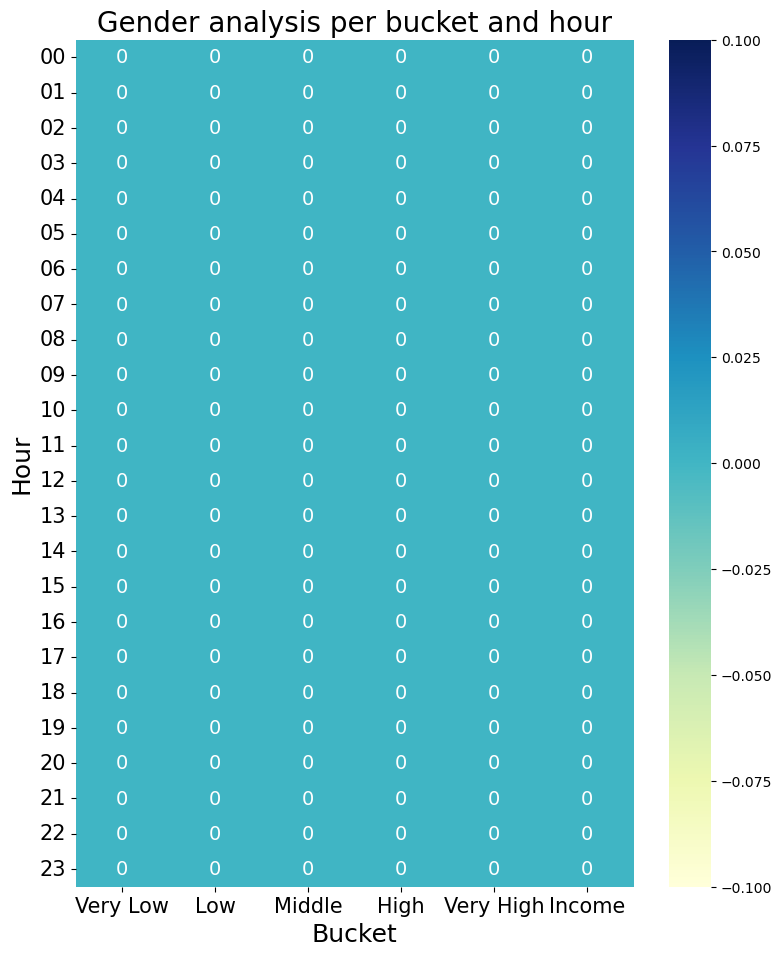

In [22]:
# Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Разбиение расходов на 5 бакетов amount_bucket
merged_data['amount_bucket'] = pd.qcut(merged_data.loc[merged_data['amount'] < 0, 'amount'], q=5, labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])

# Добавление новой категории 'Income' и заполнение пустых значений
merged_data['amount_bucket'] = merged_data['amount_bucket'].cat.add_categories('Income').fillna('Income')

# Выделение часа транзакции из tr_datetime
merged_data['tr_hour'] = merged_data['tr_datetime'].str.split().str[1].str[:2]

# Построение сводной таблицы
pivot_table = merged_data.pivot_table(index='tr_hour', columns='amount_bucket', values='gender', aggfunc='count')

# Функция для отрисовки сводной таблицы
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.3g', annot_kws={"size": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()


# Отрисовка сводной таблицы
plot_pivot_table(pivot_table)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [9]:
# Type your code here
